# Data Analysis With Python

## Objetivos

Luego de completar esta lab seras capas de :
 - Explorar atributos y caracteristicas para predecir el precio del automóvil.

## Tabla de Contenidos

- 1. Importar información desde un Módulo
- 2. Analizar patrones individuales de atributos usando Visualización
- 3. Análisis estadístico descriptivos
- 4. Agrupamiento Básico
- 5. Correlacionismo y Coincidencia
- 6. ANOVA

### ¿Cuales son las principales caracteristicas que tienen mayor impacto en el precio del auto?

## 1. Importa la información desde el módulo 2

### Preparación
importa las librerías

In [31]:
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

Carga la información almacenada en df:

In [32]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [33]:
df = pd.read_csv(filename, header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Analiza patrones de atributos individuales usando visualización

para instalar `Seaborn` usamos pip, el manejador de paquetes de Python.

Importa los paquetes de visualización `"Matplotlib"` y `"Seaborn"`.No olvides '%matplotlib inline' para gráficar en un cuaderno Jupyter".

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

## ¿Como escoger el método correcto de visualización?

Cuando visualizas variables individuales, es importante primero entender con que tipo de variables estas tratando. Esto nos ayudara a encontrar el método de visualización correcta para esa variable.

In [35]:
# lista el tipo de dato para cada columna

df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

## Pregunta #1:
**Cual es el tipo de información para la columna "peak-rpm"**

In [36]:
# Escribe tu código acá abajo
df["peak-rpm"].dtype

dtype('float64')

Por ejemplo, podemos calcular la correlación entre variables de tipo "int64" o "float64 usando el método "corr".

In [37]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

Los elementos diagonales son siempre uno; estudiaremos correlación mas precisamente Pearson correlation al final del notebook.

## Pregunta #2:

**Encuentra la correlación entre las siguiente columnas: bore, stroke, compression-ratio y horsepower.**

Pista: si deseas seleccionas esas columnas, usa la siguiente sintaxis: df[["bore", "stroke", "compression-ratio", "horsepower"]]

In [38]:
df[["bore", "stroke", "compression-ratio","horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


### Variables  Numéricas continuas:

Variables numéricas continuas son variables que puede contener cualquier valor en cierto rango. EEllas pueden ser de tipo "int64" o "float64". Una gran manera de visualizar estas variables es usar gráficos de dispersión(scatterplots) con lineas ajustadas (fitted lines).

Para comenzar a entender la relación (lineal) entre una variable individual y el precio, podemos usar `"regplot"` el cual gráfica gráficos de dispersion mas lineas ajustadas para cada información.

Veamos varios ejemplos de diferentes relaciones lineales:

## Relación Lineal Positiva (Positive Linear relationship)

Veamos el gráfico de dispersion de "engine-size" y "price"

(0.0, 53280.291622353296)

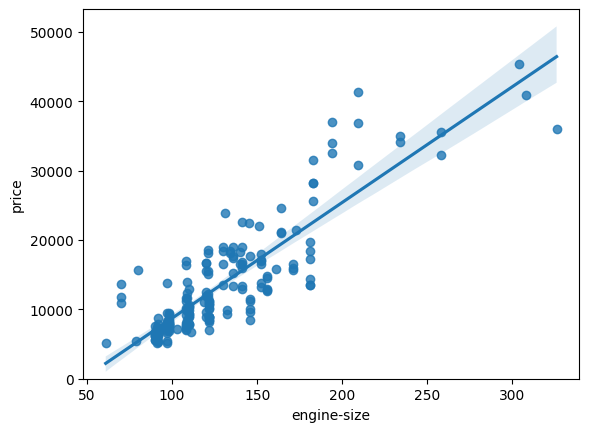

In [39]:
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,)

Mientras que el tamaño de motor aumenta, el precio también aumenta: esto indica una correlación positiva entre estas variables. El tamaño del motor pare ser un buen indicador de precio dado que la regresión lineal es casi una linea diagonal perfecta.

Podemos examinar la correlación entre "engine-size" y precio y ver que es aproximadamente 0.87.

In [40]:
df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


"highway-mpg" es un potencial predictor de la variable precio. Vamos a ver el gráfico de dispersion de "highway-mpg" y "price".

<Axes: xlabel='highway-mpg', ylabel='price'>

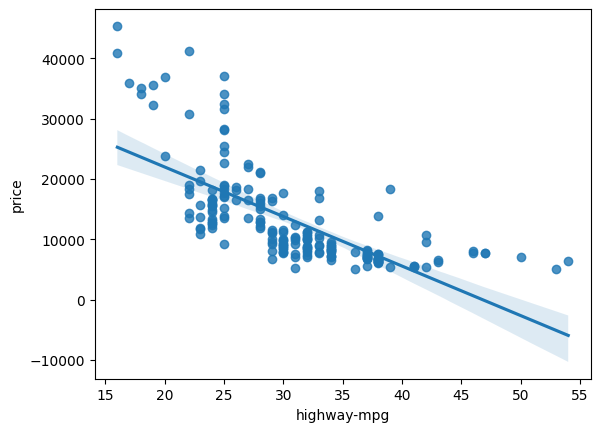

In [41]:
sns.regplot(x="highway-mpg",y="price",data=df)

Mientras highway-mpg sube, el precio baja: esto indica una relación inversa/negativa entre estas dos variables. Highway mpg puede potencialmente ser un predictor de precio.

Podemos examinar la correlación entre "highway-mpg" y precio y ver que es aproximadamente -0.704.

In [42]:
df[["highway-mpg","price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


## Relación lineal Débil (Weak Linear Relationship)

Veamos si "peak-rpm" es una variable predictora de "price"

<Axes: xlabel='peak-rpm', ylabel='price'>

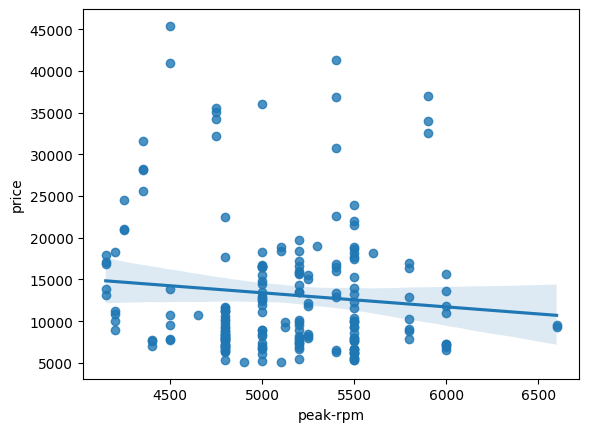

In [43]:
sns.regplot(x="peak-rpm",y="price",data=df)

Peak rpm no parece ser un buen predictor dado que la regresión lineal es cercana a ser horizontal. Ademas los puntos de información se encuentran bastante dispersos y lejos de la linea de ajuste, mostrando mucha variabilidad. Es por esto, que no es una variable confiable.

Podemos examinar la correlación entre "peak-rpm" y precio es aproximadamente -0.101616.

In [44]:
df[["peak-rpm","price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


## Pregunta #3 a):

**Encuentra la correlación entre x="stroke" y y="price".**

**Pista: Si deseas seleccionar esas columnas usa la siguiente sintaxis: df[["stroke","price"]]**

In [45]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


## Pregunta #3 b):

**Dada la correlación resultante entre "price" y " stroke", esperas una relación lineal?**

**verifica tu resultado usando la función "regplot()"**

<Axes: xlabel='stroke', ylabel='price'>

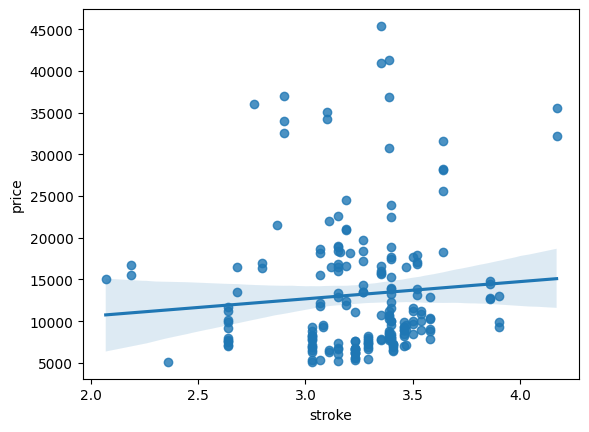

In [46]:
sns.regplot(x="stroke",y="price",data=df)

## Variables Categóricas (Categorical Variables)

Estas son variables que describen una "característica" de una unidad de información, y son seleccionadas de un grupo pequeño de categorías. Las variables categóricas son de tipo "object" o "int64". Una buena manera de visualizar una variable categórica es usando un gráfico de caja (Boxplots).

Veamos la relación entre "body-style" y "precio".

<Axes: xlabel='body-style', ylabel='price'>

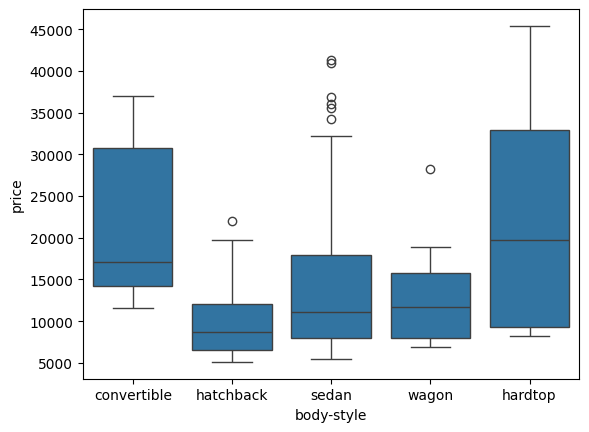

In [47]:
sns.boxplot(x="body-style", y="price",data=df)

Vemos que las distribuciones de precio en las diferentes categorías de body-style tienen una superposición significativa, por lo que "body-style" no sería un buen predictor de "price". 

Examinemos el motor "engine-location" y "price"

<Axes: xlabel='engine-location', ylabel='price'>

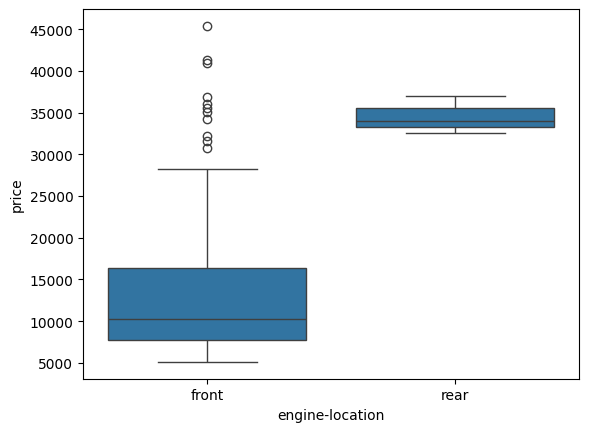

In [48]:
sns.boxplot(x="engine-location", y="price",data=df)

Acá vemos la distribución de precio entre las dos categorías de engine-location, front y rear, son lo suficientemente distintas para ser un potencial buen predictor de "price".

Examinemos "drive-wheels" y "price".

<Axes: xlabel='drive-wheels', ylabel='price'>

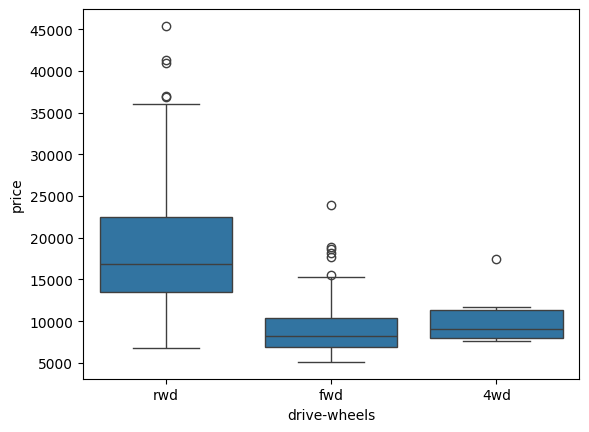

In [49]:
sns.boxplot(x="drive-wheels",y="price",data=df)

Podemos ver que la distribución de precio entre las diferentes categorías de drive-wheels difiere. Como resultado., drive-wheels puede potencialmente ser un predictor de price.

## 3. Análisis Estadístico Descriptivo

Veamos primero las variables utilizando un método descriptivo.

La función **describe** automáticamente computa estadísticas básicas para todas las variables continuas. Cualquier valor NaN es saltado de forma automática en estas estadísticas.

Esto te mostrara:

 - El conteo de esa variable
 - La media (promedio)(mean)
 - La desviación estándar (std)
 - El valor mínimo
 - El IQR (Interquartile Range: 25%,50%,75%), que es la diferencia entre el tercer y el primer cuartil
 - El valor máximo

Podemos aplicar el método "describe" de la siguiente manera:

In [50]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


Las opciones por defecto de `"describe"` se salta las variables tipo object. Podemos aplicar el método `"describe"` en variables de tipo object de la siguiente manera:

In [51]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


## Contar Valores (Value Counts)

Contar valores es una buena manera para entender cuantas unidades de cada característica/variable tenemos. Podemos aplicar el método `"value.counts"` en la columna "drive-wheels". No lo olvides el método "value_counts" solo funciona en una serie de *pandas*, no en un dataframe de *pandas*. Como resultado, solo incluimos un bracket `df.["drive-wheels"]`, y no dos brackets `df[["drive-wheels"]]`.

In [52]:
df["drive-wheels"].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

Podemos convertir la serie a un dataframe de la siguiente manera:

In [53]:
df["drive-wheels"].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Repitamos los pasos de arriba pero los guardaremos en el dataframe "drive_wheels_counts" y renombraremos la columna "drive-wheels" a "value_counts"

In [54]:
drive_wheels_counts = df["drive-wheels"].value_counts().to_frame()
drive_wheels_counts.rename(columns={"drive-wheels":"value_counts"},inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Ahora renombraremos el indice a "drive-wheels"

In [55]:
drive_wheels_counts.index.name= "drive-wheels"
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Podemos repetir los pasos de arriba con la variable "engine-location".

In [56]:
engine_loc_count=df["engine-location"].value_counts().to_frame()
engine_loc_count.rename(columns={"engine-location":"value_counts"}, inplace=True)
engine_loc_count.index.rename="engine-location"
engine_loc_count.head(10)

,count
engine-location,
front,198
rear,3


Luego de examinar el conteo de valores de engine location, podemos ver que engine location no seria una buena variable predictora de price. Esto es por que solo tenemos tres autos con el motor en la parte trasera y ciento noventa y ocho con el motor en la parte delantera, así que este resultado esta inclinado. Por lo tanto, no somos capaces de dar ninguna conclusion a cerca de la posición del motor.

## 4. Agrupamiento Básico (Basic Grouping)

El método groupby agrupa información de diferentes categorías. La información esta agrupada en base a bastantes variables, y el análisis es realizado en los grupos individuales.

Por ejemplo, vamos a agrupar por la variable "drive-wheels". Vemos que hay tres categorías diferentes de drive wheels.

In [57]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Si queremos saber, la media, que tipo de drive wheels tiene mas valor, podemos agrupar "drive-wheels" y luego promediarlas.

Podemos seleccionar la columna "drive-wheels", "body-style" y "price", y asignarla a la variable "df_group_one".

In [58]:
df_group_one = df[["drive-wheels","body-style","price"]]

Ahora podemos calcular el promedio de cada categoría de información.

In [59]:
df_group_one = df_group_one.groupby(["drive-wheels"],as_index=False)["price"].mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


De nuestra información, pareciera ser que rear-wheel, son en promedio, los mas costosos, mientras que 4-wheel y front-wheel son aproximadamente el mismo precio.

También puedes agrupar por multiples variables. Por ejemplo vamos a agrupar por ambas variables "drive-wheels" y "body-style". Podemos almacenar el resultado en la variable "grouped_test1".

In [60]:
df_gptest = df[["drive-wheels","body-style","price"]]
grouped_test1 = df_gptest.groupby(["drive-wheels", "body-style"],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Esta información agrupada es mucho mas fácil de visualizar cuando se traspasa a una tabla pivot. Una tabla pivot es como una hoja de cálculos de excel, con una variable a lo largo de la columna y otra a lo largo de la fila. Podemos convertir dataframes en una tabla pivot al usar el método `"pivot"` para crear una tabla pivot de los grupos.

En este caso, dejaremos la variable drive-wheels como las filas de la tabla, y el pivot body-style se convertirá en las columnas de la tabla.

In [61]:
grouped_pivot = grouped_test1.pivot(index="drive-wheels",columns="body-style")
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

## Pregunta 4:

**Usa la función groupby para encontrar el promedio de "price" para cada vehículo basado en body-style**

In [62]:
df_gptest2= df[["body-style","price"]]

df_gptest2 =df_gptest2.groupby(["body-style"],as_index=False).mean()
df_gptest2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


### Variables: Drive Wheels y Body Style vs Price.

Usaremos un mapa de calor para visualizar la relación entre Body Style vs Price.

C:\Users\reivi\AppData\Local\Temp\ipykernel_11248\887112695.py:2: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


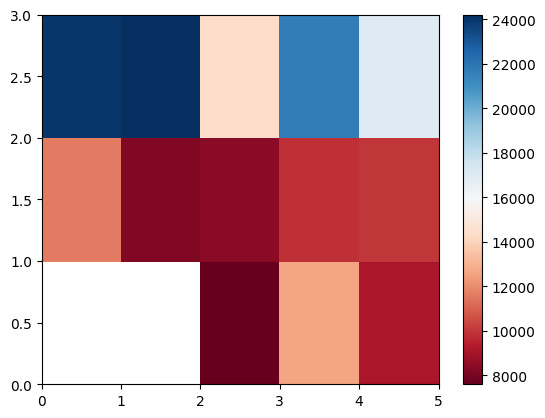

In [63]:
plt.pcolor(grouped_pivot,cmap="RdBu")
plt.colorbar()
plt.show()

El mapa de calor gráfica la variable objetivo "price" proporcionalmente a los colores de "drive-wheels" y "body-style" en el eje vertical y horizontal respectivamente, esto nos permite visualizar como el precio es correlativo a "drive-wheels" y "body-style".

Los rótulos por defecto no aportan ningún tipo de información util. Vamos a cambiarlos.

C:\Users\reivi\AppData\Local\Temp\ipykernel_11248\3671695375.py:19: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im)


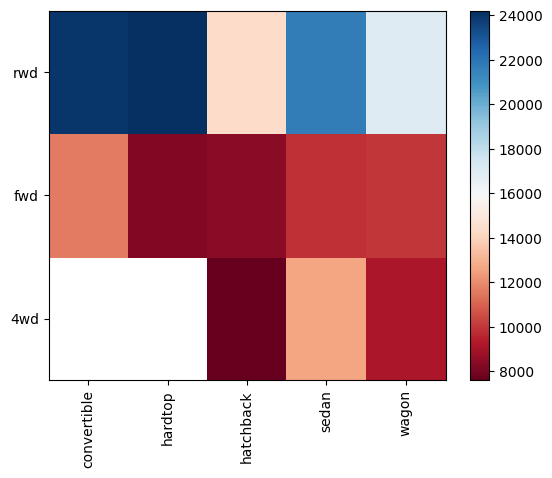

In [65]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

La visualización es muy importante en data science, y los paquetes de visualización de Python proveen una gran libertad. Lo veremos mas en profundidad en un curso de visualización por separado.

La pregunta principal que queremos responder en este modulo es, ¿"Cuales son las principales caracteristicas que tienen el mayor impacto en el precio del vehículo?"

Para obtener una mejor medida de las caracteristicas importantes, miramos la correlación de estas variables con el precio del vehículo. En otras palabras: ¿Como es el precio del vehículo dependiendo de estas variables?

## 4. Correlación y Casualidad

**Correlación**: Una medida del grado de interdependencia entre variables.

**Casualidad**: La relación entre causa y efecto entre dos variables.

Es importante saber la diferencia entre estas dos. Correlación no implica Causalidad. Determinar correlación es mucho mas simple la determinación de causalidad puede requerir experimentar de forma independiente